In [81]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt


In [82]:
#input: list of n triangles (3n vertices), as an nparray with shape (3n,2)
#output: rasterized screen
def raster(tris):
    list = np.array_split(tris, int(np.shape(tris)[0]/3) , axis=0)
    plt.figure(figsize=(12, 12), dpi=100)
    plt.axis('equal')
    for tri in list:
        x = tri[ :,0]
        y = tri[ :,1]
        plt.fill(x, y)
    plt.ylim([10, 40])
    plt.xlim([-20, 10])
    plt.show()

In [83]:
import math
class Model:
    vertices: npt.NDArray # list of vertices
    position: npt.NDArray # 3 dimensional vector, position of the model in the world
    scale:    npt.NDArray # 3 dimensional vector, how much each coordinate of the model is scaled
    rotation: npt.NDArray # euler angles representation of rotation
    def __init__(self, verts, pos, scale, rot):
        self.vertices = verts
        self.position = pos
        self.scale = scale
        self.rotation = rot
        pass

model_vertices = [[-1,0,0],[-1,0,1],[1,0,0], [1,0,0],[-1,0,1],[1,0,1], [-1,0,0],[1,1,0],[1,0,0], [-1,0,0],[1,1,0],[-1,1,0]]
model_vertices = np.array(model_vertices)
model_pos = np.array([0.5, 0.5, 0.5]) # translate x,y,z to 0.5, 0.5, 0.5
model_scale = np.array([2,1,1]) 
model_rotation = np.array([45,0,0])
model =  Model(model_vertices, model_pos, model_scale, model_rotation)

# RPG_8 update
shape = model_vertices.shape[0]
last_column = np.ones((shape, 1))
model_vertices = np.hstack((model_vertices,last_column))

# convert degree to radian
model_rotation_radian = np.radians(model_rotation)

scale = np.array([[model_scale[0], 0, 0, 0], # create scale matrix
                [0, model_scale[1], 0, 0],
                [0, 0, model_scale[2], 0],
                [0, 0, 0, 1]])

rotate_x = np.array([[1, 0, 0, 0], # rotate around x
                    [0,  math.cos(model_rotation_radian[0]), math.sin(model_rotation_radian[0]), 0],
                    [0, -math.sin(model_rotation_radian[0]), math.cos(model_rotation_radian[0]), 0],
                    [0, 0, 0, 1]])

rotate_y = np.array([[math.cos(model_rotation_radian[1]), 0, -math.sin(model_rotation_radian[1]), 0], # rotate around y
                    [0, 1, 0, 0],
                    [math.sin(model_rotation_radian[1]), 0,  math.cos(model_rotation_radian[1]), 0],
                    [0, 0, 0, 1]])

rotate_z = np.array([[math.cos(model_rotation_radian[2]), -math.sin(model_rotation_radian[2]), 0, 0], # rotate around z
                    [math.sin(model_rotation_radian[2]),  math.cos(model_rotation_radian[2]), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
rotate = np.dot(np.dot(rotate_x, rotate_y), rotate_z) # create rotate matrix

translate = np.array([[1, 0, 0, model_pos[0]], # create translation matrix
                      [0, 1, 0, model_pos[1]], 
                      [0, 0, 1, model_pos[2]], 
                      [0, 0, 0, 1]])

world_transformation = np.dot(translate, np.dot(scale, rotate)) 

In [84]:
camera_pos = np.array((10,10,10))

# RPG_8 update
world_up_vector = np.array((0, 1, 0))

camera_model = []

forward_vector = model_pos - camera_pos # get forward vector
norm_vector = np.linalg.norm(forward_vector)
forward_vector /= norm_vector

right_vector = np.cross(forward_vector, world_up_vector) 
norm_vector = np.linalg.norm(right_vector)
right_vector /= norm_vector

up_vector = np.cross(forward_vector, right_vector)
norm_vector = np.linalg.norm(up_vector)
up_vector /= norm_vector

# create transformation matrix with basic vectors
transformation_matrix = np.array([[right_vector[0], right_vector[1], right_vector[2], 0],
                         [up_vector[0], up_vector[1], up_vector[2], 0 ],
                         [-forward_vector[0], -forward_vector[1], -forward_vector[2], 0 ],
                         [0, 0, 0, 1]])

# create transformatin to move point to camera position
camera_position = np.array([[1, 0, 0, -camera_pos[0]], 
                         [0, 1, 0, -camera_pos[1]],
                         [0, 0, 1, -camera_pos[2]], 
                         [0, 0, 0, 1]])

# final transformation to camera space
camera_transformation = np.dot(transformation_matrix, camera_position)


In [85]:
# apply camera transformation then world_transformation for each verticle
for i in range(len(model_vertices)):
    
    model_vertices[i] = np.dot(world_transformation, np.dot(camera_transformation, model_vertices[i]))

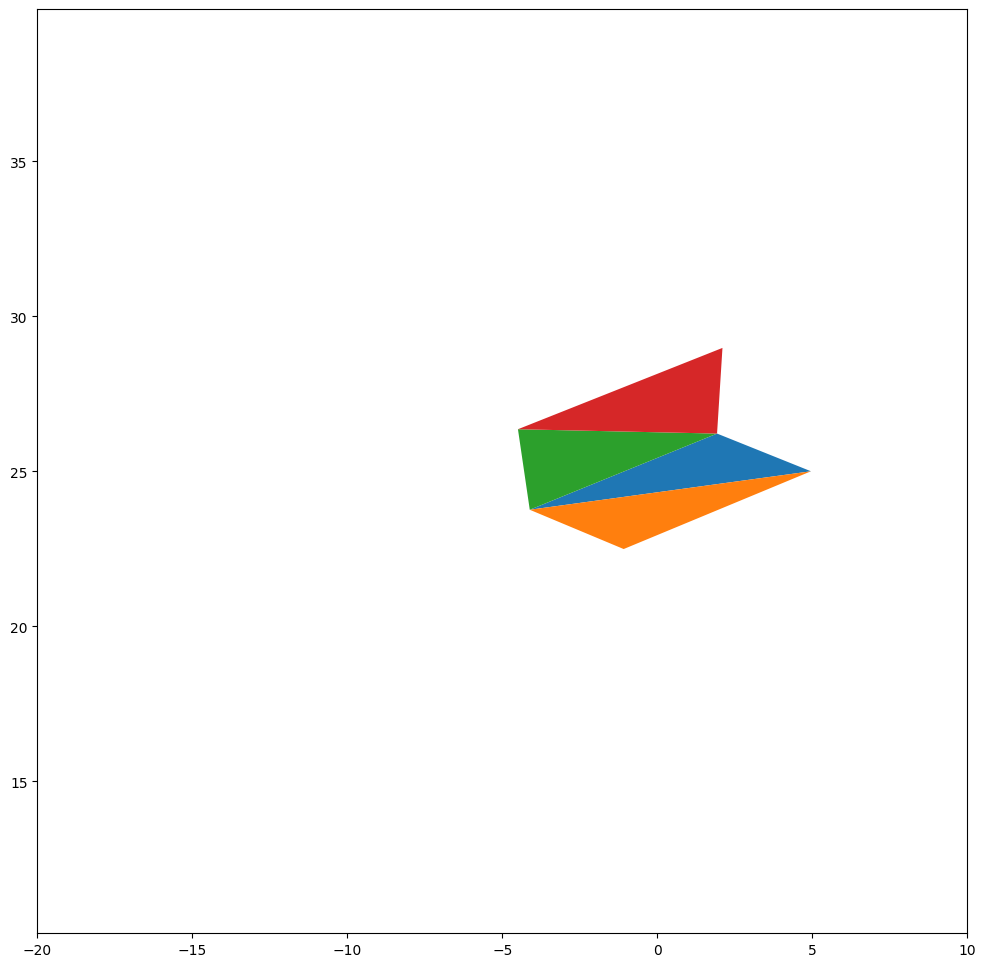

In [86]:
v_w = 4
v_h = 4
c_w = 100
c_h = 100
d = 1

plane_model = []
v1 = []

# move each varticle to plane space
for v in model_vertices:
    v1.append((v[0] * d) / v[2])
    v1.append((v[1] * d )/ v[2])
    v1[0] = (v1[0] * c_w) / v_w
    v1[1] = (v1[1] * c_h) / v_h
    v1 = np.array(v1)
    plane_model.append(v1)
    v1 = []


plane_model = np.array(plane_model)
raster(plane_model)